# ResNet

* ref) https://arxiv.org/pdf/1512.03385.pdf

* GoogleNet(Inception Net)은 2014년 ILSVRC대회 우승 : 오차 6.67%
* ResNet은 2015년 ILSVRC대회 우승 : 오차 3.57% ==> 엄청나게 성능 향상을 이루게 되었음!!! 엄청난 주목과 우와의 경지가 올라오게 됨!!!!!!
* MS Research 팀에서 제시를 한 방법론임!!!
* 이름에 답이 있듯이 이 모델의 핵심은 `Residual module 잔차모듈` + `Skip Conncetion 스킵연결`임.

* 생각의 출발점 : 과거로 돌아가서 2015년도 시점으로 생각을 하면, 앞의 VGG/GoogleNet을 보면 기본적인 방향이 `더 깊이 더 깊이`가 주된 개발의 흐름임을 알 수 있음!!!! ==> 그 이유는 층수가 많아질 수록 더 좋은 특징을 추출할 수 있기 때문임. ==> 그 결과 모델의 표현력이 증가할 수 있어서 다양한 이미지들을 잘 처리를 하게 된다고 생각을 함.
* VGG-19층, GoogleNet 22층 ==> 이 모든 모델이 ImageNet에서 우수한 성능을 보여주고 있었음.
*****
* Q) 그러면 더더더더 늘리면 좋을까? No!!! Why? 층수만 무작정 늘어나게 되면, 신경망이 과적합 overfit이 발생하게 된다!!!! --> 그래서 dropout/ l2 규약, BN(배치정규화)등을 이용하여 해결하고, 그 결과 수십~수백층으로 올리기도 한다 ==> 그럼에도 불구하고 가장 핵심은 깊은 네트워크 상에서 `Gradient Vanishing`문제를 어떻게 극복을 할 것인가가 중요한 이슈가 됨!!!!!
*******

* 구체적으로 질문에 대해서 이야기를 하면 : 네트워크 깊이를 깊게하면 당여하게 OverFit은 이해가 되는데, 실험을 하니 UnderFit이 발생하는데..그게 가능한가!!What the~~;;; ==> 성능이 개판되네;;`degradation problem`이라 함.
<img src="https://drive.google.com/uc?id=12JkjKVUkkR17OnCmZOUoV30aM6NBMGLj">
<br>
==> 오잉?? 20층이 56층 보더 더 좋은디??<br>
==> 위의 그래프를 보면 깊이가 깊은 것이 train에러가 얕은 것 보다도 더 크네;;;;흐미;;;
<br>
==> 물론 저자들도 정확하게 이유를 설명은 하지 못함.<br>
==> overfitting과 차이점은 무엇인가 생각하면 overfit은 레이어가 깊으면 주어진 train에서는 잘 하는데, 뉴한 test에서는 망가지는 현상인데, 위의 결과는 train에 대한 것이고 이것을 : `degradation problem`이라고 함!!!

* 이 저자들의 제안 & 이 논문의 핵심은 이거 하나로 끝남!!!!!
<img src="https://drive.google.com/uc?id=1C2GR6cqjPGvZY7wo9ao0LPC_XhHKFOtg">

In [ ]:
# 기본적인 아이디어 : 기존의 통념은 깊게하면 성능 좋다더라
# --> 해봤는데,,,오히려 떨어지더라....
# --> 이유 : 깊어서,,,역전파가 잘 안 올라가던데,,,,
# ==> 해결책 : 중간에 skip 을 이용해서 short cut으로 만든것!!!
#              실험을 했더니..conv1층만 하고, short cut
#                             F(x) = W1X + X
#              성능이 별로였습니다...
#              conv 2층을 한 것을 건너띄어야 성능이 좋더라(실험)
#    논문상 그림2/3에서 cnov 2단계 건너띄고 short cut을 연결!!
#              F(x)= relu( xW1) W2 + x

# Residual Block그림 2에서 참조
# 네트워크를 통해서 오는 F(X) + 숏컷으로 오는 X
# ===> Block 입장의 최종 출력 H(X) = F(X) + X
#      수식에 대한 기준으로 학습을 하는 네트워크입작으로 이항을 하면
#      F(X) = H(X) - X : out - in---> residual net ResNet
# ===> 학습은 F(x)를 찾아가는 과정임!!!!
#      H(X) ~~~ X 가 되도록 학습을 시키자!!!!!!!
#      입력과 거의 유사한 출력이 나오도록 학습을 시키자!!!!
#      입출의 입장에서는 거의 유사한 값들이 나오도록( 레이어에서 큰 역할 X)
#      소소한 작은 변화들을 레이어가 깊도록 축적시키자!!!
# ===> 학습의 목적은 H(x)-x 학습핮!

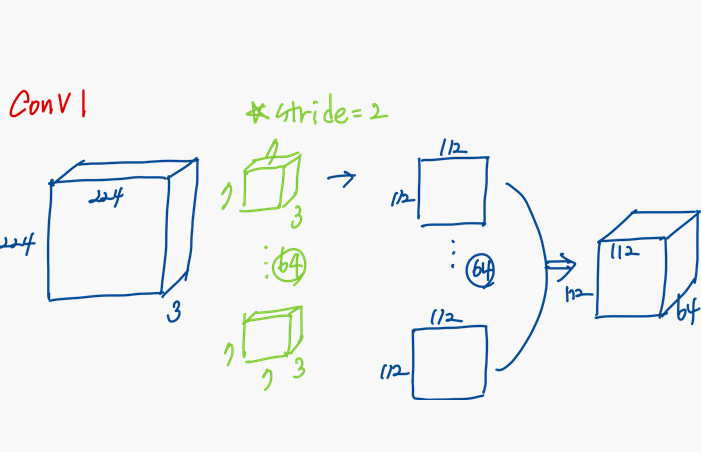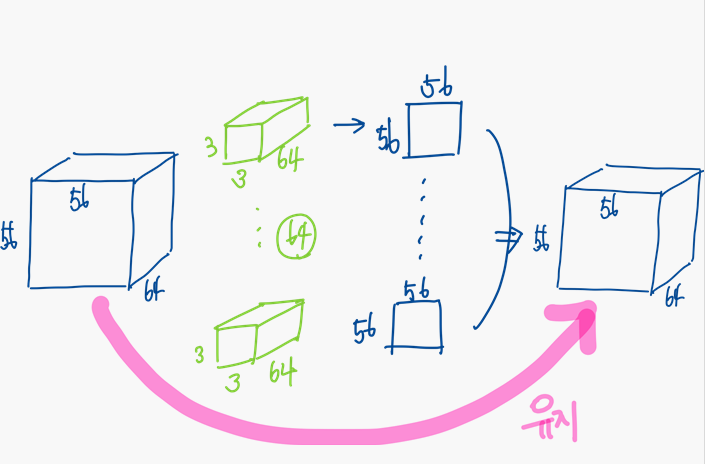)

In [ ]:
# ==> 이런식으로 반복을 통해서 진행을 하는 것이 ResNet
#     더 깊게 네트워크를 쌓아 나갈 수 있다!!!!!!
# ==> 논문상 그림3번의 의미는 Vgg16보다 ResNet 34가 동일한 FM이여도
#     레이어들을 더 많이 쌓아서 진행했다..( ResNet Block 사용해서.)

# +++ 저자들도 더 쌓아봤습니다...34층 그 이상을 실험을 했는데,,,
#     ==> 효율성이나 네트워크가 깊어져서 발생하는 문제들 때문에...
#         50층 이상에서는 bottleNet 구조로 설계하는게 좋다!!!!
#         1*1 --- 3*3 --- 1*1
# Table1에서 Layer 50이사으이 구조에서는 bottleNet 구조로 설계를 조금
# 변형해서 진행을 했습니다....


# 참고로 후속연구들은 있습니다..(왜 잘 되는지 설명,,,)
# 자주 사용되는 패턴 중 하나임!!!!!!!!!!!
# ===> 이런 ResNet 구조를 수정해서 하는 모델이 자주 나옴!!!!!

In [ ]:
# => 입력 데이터의 모양을 변환
# conv2D로 인코더 파트를 구현을 하려고 함
# (6000,28,28,1)
# => 채널에 대한 숫자는 내가 신경안쓰고 처리하기 위해서

train_X = trxin_X.reshape(-1, 28,28,1) # -1 남은 배열의 길이와 남은 차원으로 알아서 추정해서 해라
test_X = test_X.reshape(-1, 28,28,1)

